In [2]:
from fastai.vision.all import *
import timm

In [3]:
path = untar_data('https://data-set-ml.oss-cn-hangzhou.aliyuncs.com/PandasBearsFlatten.zip')/'PandasBears';

In [4]:
print(path)

/Users/nazha/.fastai/data/PandasBearsFlatten/PandasBears


In [5]:
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=RegexLabeller(pat= r'^([^/]+)\-\d+'), item_tfms=Resize(224))

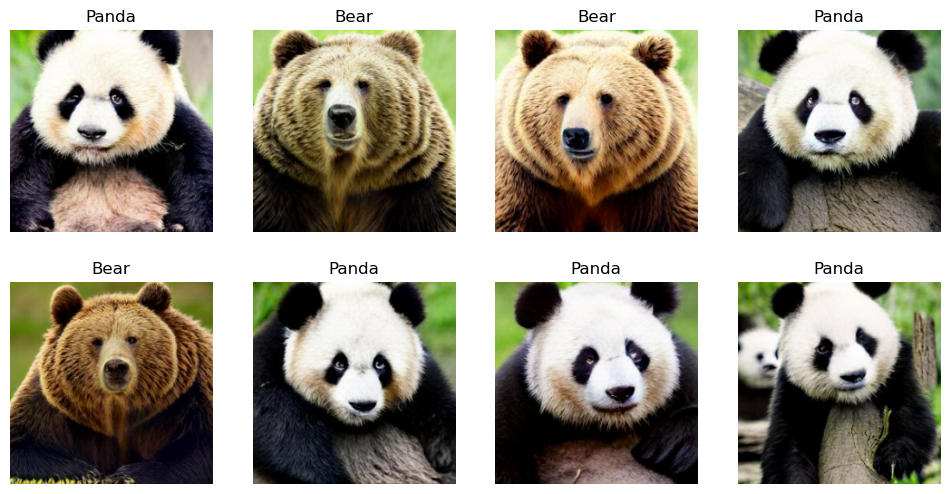

In [7]:
dls.show_batch(max_n=8, nrows=2)

In [8]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

/Users/nazha/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/nazha/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


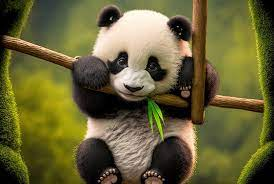

In [18]:
img = PILImage.create('images/Panda-002.jpg')
img

In [19]:
predict = learn.predict('images/Panda-002.jpg')

print(predict)

print(f"Probability it's a Panda: {predict[2][1].item():.6f}")

('Panda', TensorBase(1), TensorBase([4.9781e-05, 9.9995e-01]))
Probability it's a Panda: 0.999950


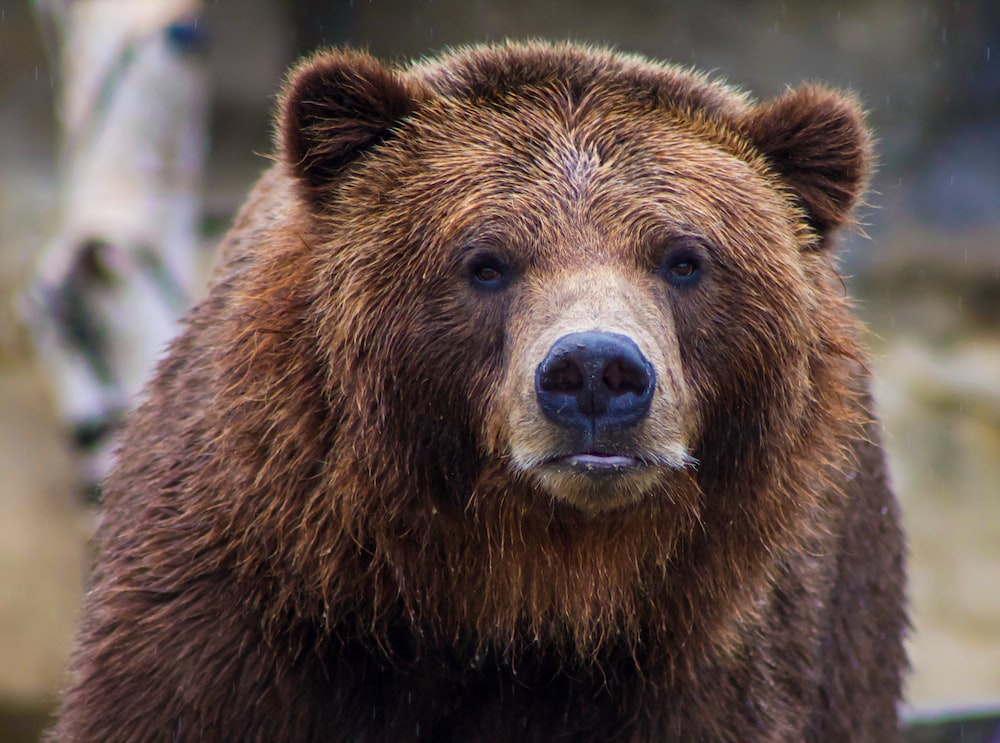

In [20]:
bearImg = PILImage.create('images/bear.jpg')
bearImg

In [21]:
predict = learn.predict('images/bear.jpg')

print(predict)

print(f"Probability it's a Panda: {predict[2][1].item():.6f}")

('Bear', TensorBase(0), TensorBase([1.0000e+00, 3.4988e-07]))
Probability it's a Panda: 0.000000


In [22]:
learn.export('pandaBears.pkl')